In [103]:
import pandas as pd

Importing SP500 2007-06-29 to 2017-07-05

In [104]:
sp = pd.read_csv('SP500.csv', index_col=None, na_values=['.'])

Filling NA Values

In [105]:
sp = sp.fillna(method='ffill')

In [107]:
from sklearn import datasets, linear_model

In [108]:
regr = linear_model.LinearRegression()

Formatting Data for Regression

In [187]:
x = sp.index.values
y = sp['SP500'].values

In [189]:
x = np.transpose(np.matrix(x))
y = np.transpose(np.matrix(y))

In [113]:
y = list(sp['SP500'].values)

In [114]:
import numpy as np

Linear Regression for entire SP500 Data

In [127]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
import matplotlib.pyplot as plt

Regression Coeficients Saved

In [117]:
m = regr.coef_[0]
b = regr.intercept_

Looping through each day, generating a linear regression for the previous 90 days, calculates error of the prediction for the current day

In [196]:
a = [None] * y.size

for day in range(91,y.size):
    regr = linear_model.LinearRegression()
    regr.fit(x[day-90:day], y[day-90:day])
    m = regr.coef_[0]
    b = regr.intercept_
    est = m*day + b
    error = abs(est - y[day])
    a[day] = error*10
    
regr = linear_model.LinearRegression()
regr.fit(x, y)
m1 = regr.coef_[0]
b1 = regr.intercept_
    
for index in range(0,len(a)):
    if a[index] == None:
        a[index] = 0
    
for index in range(0,len(a)):
    if a[index] != 0:
        a[index] = a[index].item(0)
        
a1 = np.transpose(np.matrix(a))

a1 = np.squeeze(np.asarray(a))
x1 = np.squeeze(np.asarray(x))
y1 = np.squeeze(np.asarray(y))
    

/Users/josephokeefe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


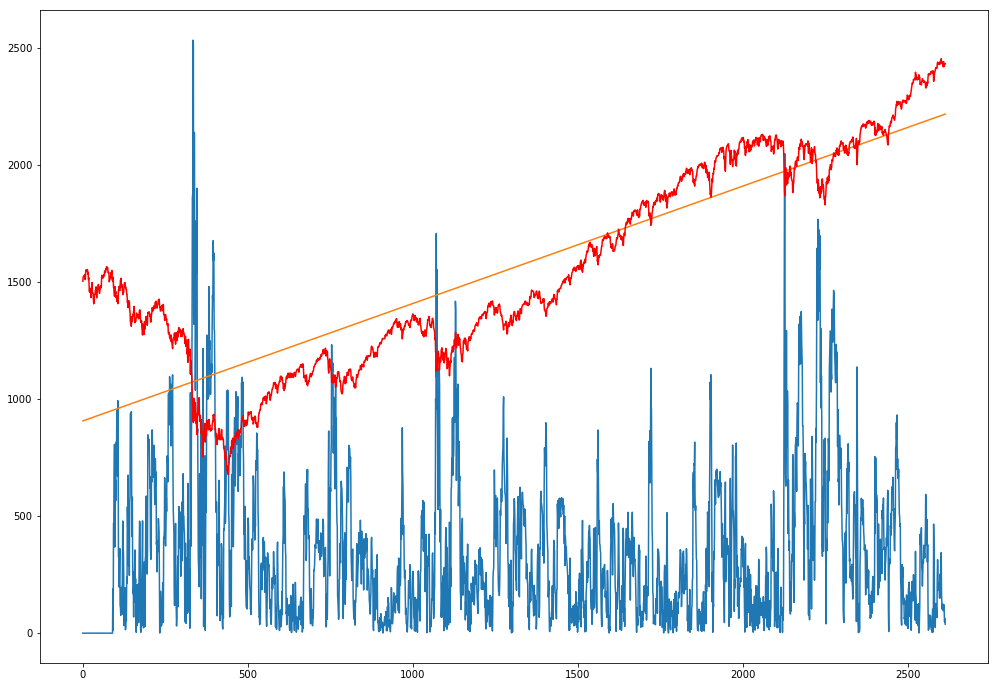

In [202]:
plt.figure(figsize=(17, 12))
plt.plot(x1, a1, x1, m1*x1 + b1, x1, y1, 'r')


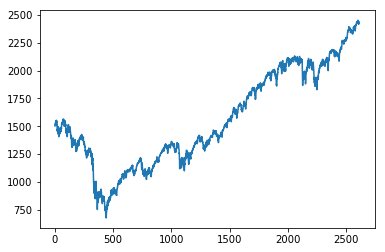

Calcualtes 40 day moving average for errors

In [242]:
a2 = pd.rolling_mean(pd.DataFrame(a1), 40)
a2 = a2.fillna(0)
a2 = a2[0].values

/Users/josephokeefe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=40,center=False).mean()
  """Entry point for launching an IPython kernel.


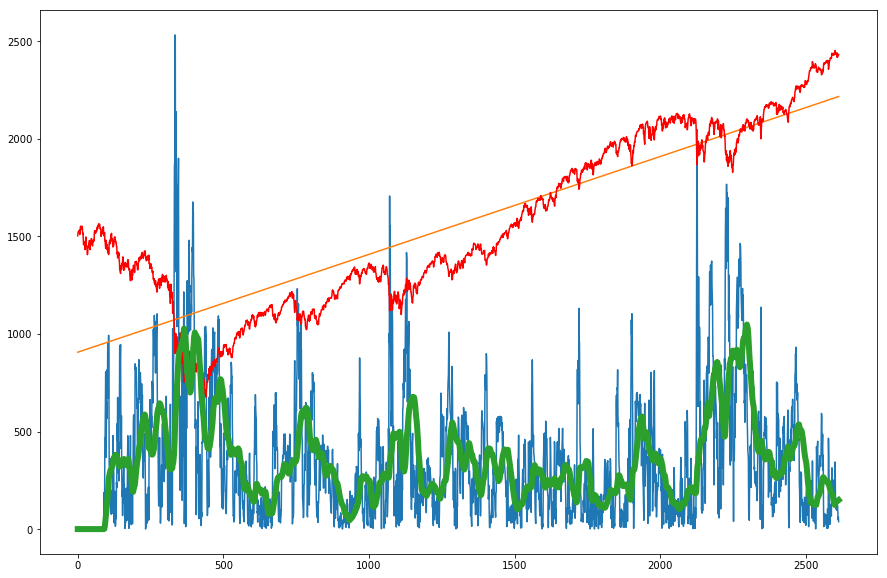

In [244]:
plt.figure(figsize=(15, 10))
plt.plot(x1, a1, x1, m1*x1 + b1, x1, y1, 'r')
plt.plot(x1, a2, linewidth = 6.0)